## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
# 데이터 로드 및 데이터프레임 생성
df = pd.read_csv( r'C:\Users\Boanerges\GitHub\rawdata\credit_final.csv')

df

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## Dataset에 대한 정보 및 대략적인 분포 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


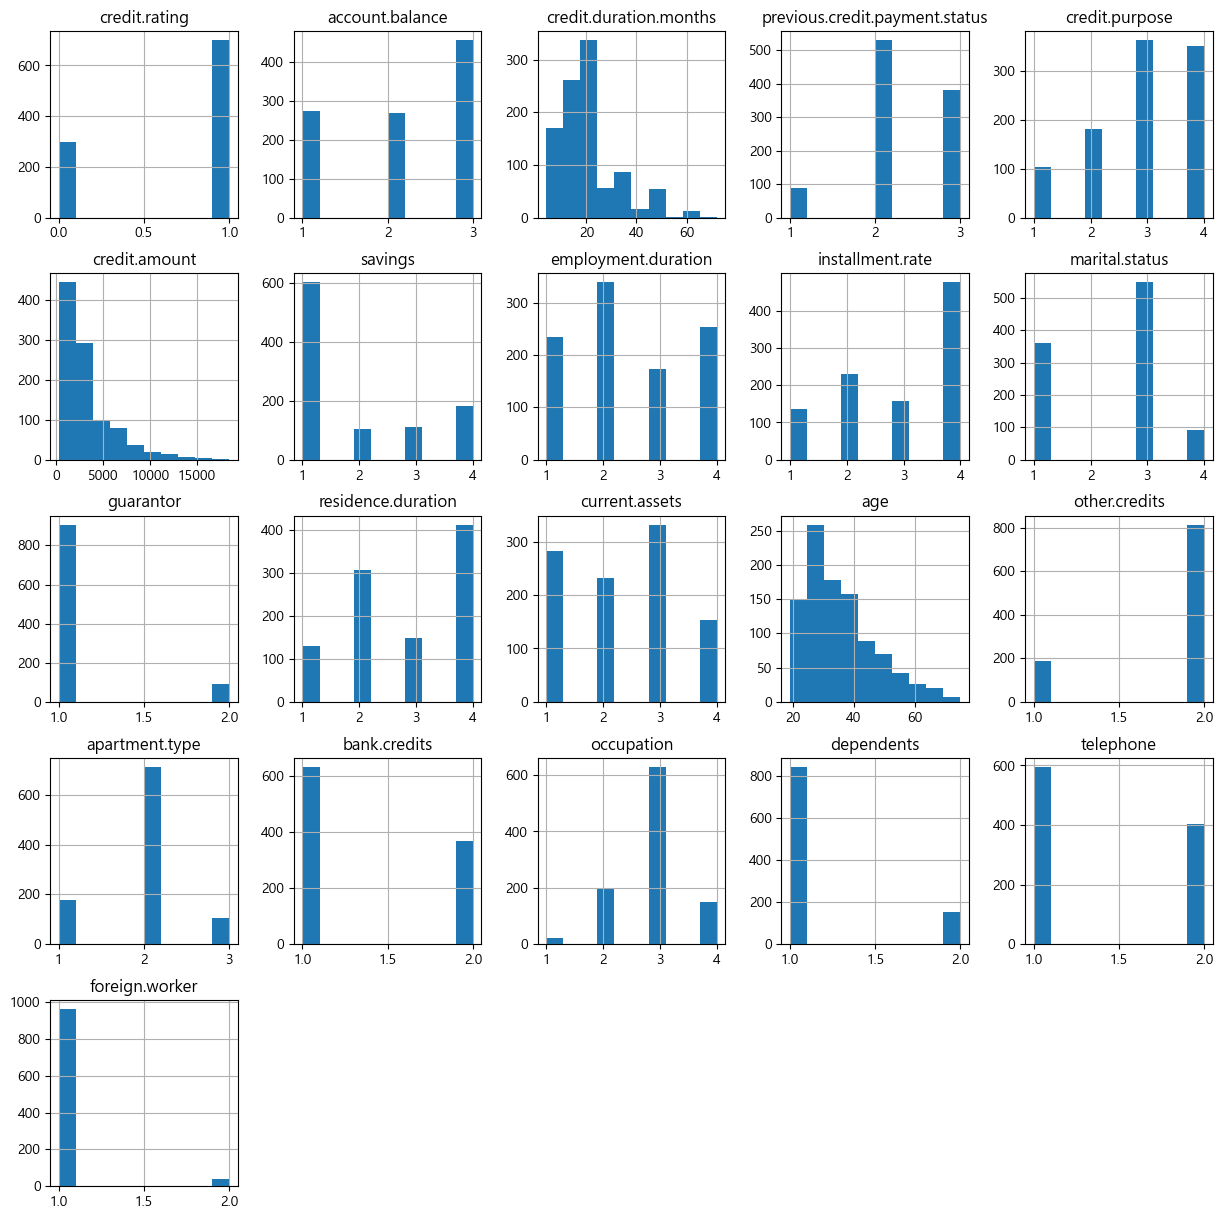

In [5]:
df.hist(figsize=(15,15))
plt.show()

In [6]:
for i in range(1, df.columns.size):
    print( 'shapiro-test p값', df.iloc[:,i].name, stats.shapiro( df.iloc[:,i] )[1] )

shapiro-test p값 account.balance 1.365796870411616e-35
shapiro-test p값 credit.duration.months 4.908141189598946e-25
shapiro-test p값 previous.credit.payment.status 1.4423096140356465e-35
shapiro-test p값 credit.purpose 1.0908271602749327e-30
shapiro-test p값 credit.amount 8.621185771526046e-34
shapiro-test p값 savings 3.394078003948818e-39
shapiro-test p값 employment.duration 8.890012125438336e-30
shapiro-test p값 installment.rate 4.300877608624469e-34
shapiro-test p값 marital.status 3.197562205441387e-37
shapiro-test p값 guarantor 0.0
shapiro-test p값 residence.duration 1.825921529881565e-32
shapiro-test p값 current.assets 7.16186299881424e-29
shapiro-test p값 age 6.92640511385329e-23
shapiro-test p값 other.credits 0.0
shapiro-test p값 apartment.type 1.7311079307584596e-38
shapiro-test p값 bank.credits 1.3088127656793791e-42
shapiro-test p값 occupation 6.3683609500797095e-34
shapiro-test p값 dependents 0.0
shapiro-test p값 telephone 4.021726592612225e-42
shapiro-test p값 foreign.worker 0.0


In [7]:
df_credit2 = df.copy()

df_credit2.iloc[:,2] = np.log1p(df_credit2.iloc[:,2])
df_credit2.iloc[:,5] = np.log1p(df_credit2.iloc[:,5])
df_credit2.iloc[:,13] = np.log1p(df_credit2.iloc[:,13])

df_credit2

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,2.944439,3,2,6.956545,1,1,4,1,...,4,2,3.091042,2,1,1,3,1,1,1
1,1,1,2.302585,3,4,7.937375,1,2,2,3,...,2,1,3.610918,2,1,2,3,2,1,1
2,1,2,2.564949,2,4,6.735780,2,3,2,1,...,4,1,3.178054,2,1,1,2,1,1,1
3,1,1,2.564949,3,4,7.660585,1,2,3,3,...,2,1,3.688879,2,1,2,2,2,1,2
4,1,1,2.564949,3,4,7.683404,1,2,4,3,...,4,2,3.663562,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3.218876,2,3,7.594884,1,2,2,3,...,4,1,3.091042,2,1,1,2,2,1,1
996,0,1,3.218876,2,4,7.742402,1,4,4,3,...,1,1,3.828641,2,2,1,3,1,1,1
997,0,3,3.091042,3,4,9.447860,4,4,4,3,...,4,4,3.433987,2,3,1,4,1,2,1
998,0,2,2.564949,2,3,8.774777,4,1,2,3,...,1,4,3.970292,2,2,1,4,1,2,1


In [8]:
df_scaled = StandardScaler().fit_transform(df_credit2)

for i in list(range(1,21,1)):
    df_credit2.iloc[:,i] = df_scaled[:,i]
    
df_credit2

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,-1.416476,0.006404,1.141437,-0.993329,-1.073423,-0.730844,-1.308566,0.918477,-1.286341,...,1.046987,-0.341055,-1.594638,0.478018,-1.751205,-0.761432,0.146949,-0.428290,-0.823318,-0.196014
1,1,-1.416476,-1.168929,1.141437,1.065384,0.190985,-0.730844,-0.403610,-0.870183,0.588792,...,-0.765977,-1.293723,0.193611,0.478018,-1.751205,1.313315,0.146949,2.334869,-0.823318,-0.196014
2,1,-0.219117,-0.688500,-0.470762,1.065384,-1.358017,0.105362,0.501345,-0.870183,-1.286341,...,1.046987,-1.293723,-1.295339,0.478018,-1.751205,-0.761432,-1.383771,-0.428290,-0.823318,-0.196014
3,1,-1.416476,-0.688500,1.141437,1.065384,-0.165830,-0.730844,-0.403610,0.024147,0.588792,...,-0.765977,-1.293723,0.461780,0.478018,-1.751205,1.313315,-1.383771,2.334869,-0.823318,5.101669
4,1,-1.416476,-0.688500,1.141437,1.065384,-0.136414,-0.730844,-0.403610,0.918477,0.588792,...,1.046987,-0.341055,0.374693,-2.091971,0.135869,1.313315,-1.383771,-0.428290,-0.823318,5.101669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-1.416476,0.508940,-0.470762,0.036027,-0.250527,-0.730844,-0.403610,-0.870183,0.588792,...,1.046987,-1.293723,-1.594638,0.478018,-1.751205,-0.761432,-1.383771,2.334869,-0.823318,-0.196014
996,0,-1.416476,0.508940,-0.470762,1.065384,-0.060358,-0.730844,1.406301,0.918477,0.588792,...,-1.672459,-1.293723,0.942528,0.478018,0.135869,-0.761432,0.146949,-0.428290,-0.823318,-0.196014
997,0,0.978242,0.274858,1.141437,1.065384,2.138185,1.777773,1.406301,0.918477,0.588792,...,1.046987,1.564281,-0.414989,0.478018,2.022944,-0.761432,1.677670,-0.428290,1.214598,-0.196014
998,0,-0.219117,-0.688500,-0.470762,0.036027,1.270499,1.777773,-1.308566,-0.870183,0.588792,...,-1.672459,1.564281,1.429773,0.478018,0.135869,-0.761432,1.677670,-0.428290,1.214598,-0.196014


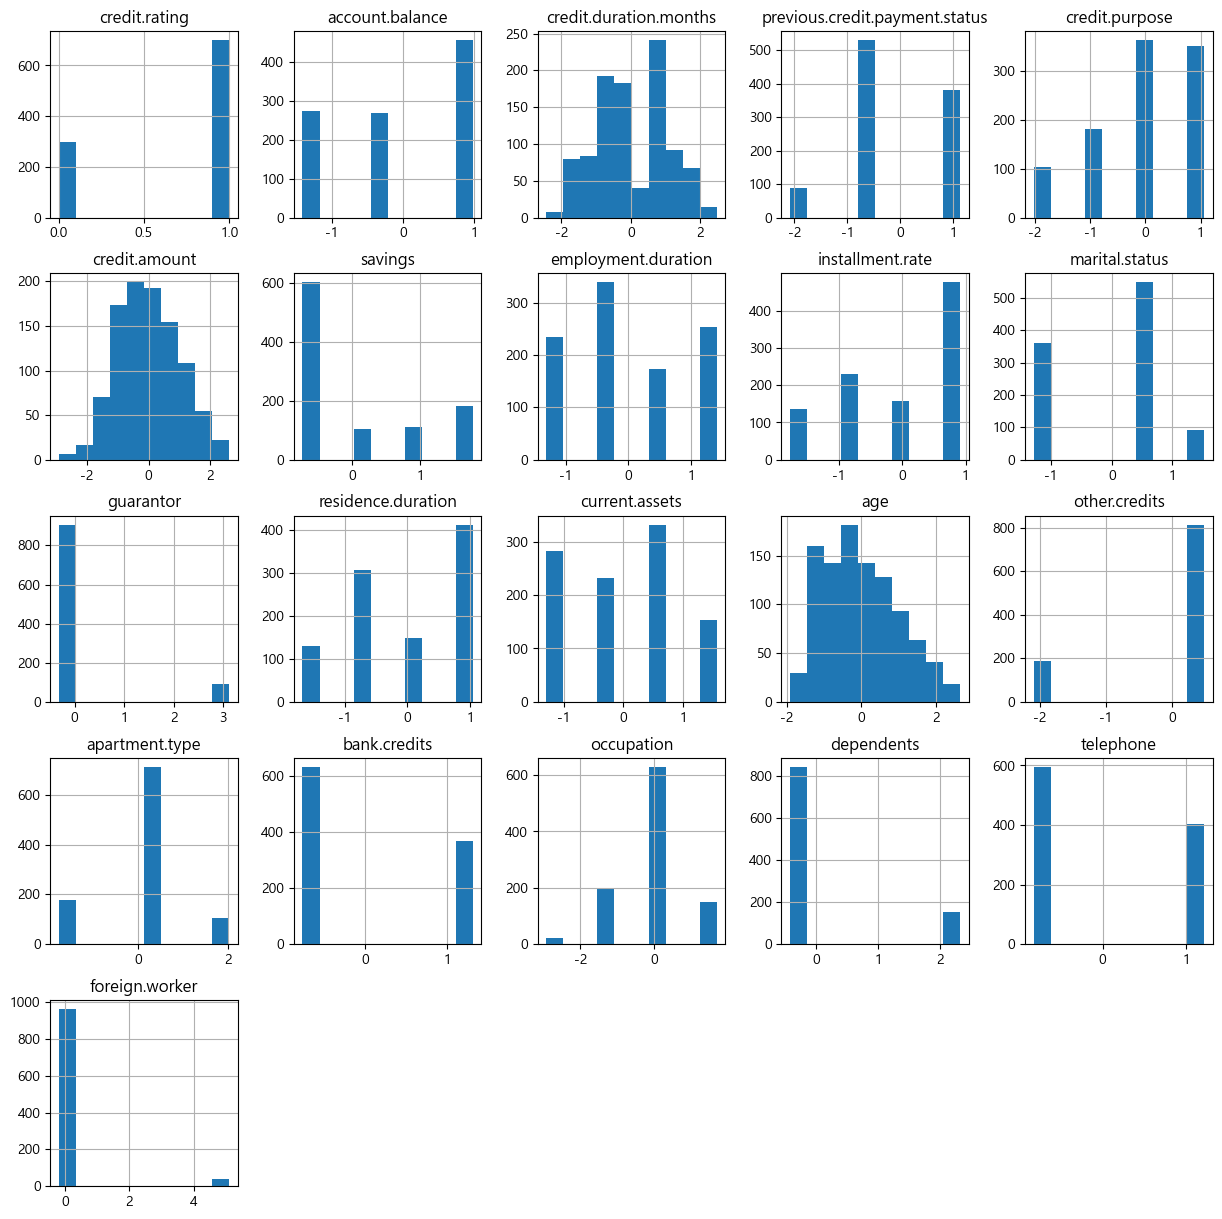

In [9]:
df_credit2.hist(figsize=(15,15))
plt.show()

In [10]:
for i in range(1, df_credit2.columns.size):
    print( 'shapiro-test p값', df_credit2.iloc[:,i].name, stats.shapiro( df_credit2.iloc[:,i] )[1] )

shapiro-test p값 account.balance 1.3651956348977068e-35
shapiro-test p값 credit.duration.months 1.7222303227634739e-12
shapiro-test p값 previous.credit.payment.status 1.4397558697776406e-35
shapiro-test p값 credit.purpose 1.088248595866969e-30
shapiro-test p값 credit.amount 0.00012071807577740401
shapiro-test p값 savings 3.395351784252889e-39
shapiro-test p값 employment.duration 8.883465468260189e-30
shapiro-test p값 installment.rate 4.297476481024258e-34
shapiro-test p값 marital.status 3.197016932182949e-37
shapiro-test p값 guarantor 0.0
shapiro-test p값 residence.duration 1.8278271531610418e-32
shapiro-test p값 current.assets 7.160794107695105e-29
shapiro-test p값 age 8.503795541001113e-13
shapiro-test p값 other.credits 0.0
shapiro-test p값 apartment.type 1.7312151300909804e-38
shapiro-test p값 bank.credits 1.3088127656793791e-42
shapiro-test p값 occupation 6.368877983923079e-34
shapiro-test p값 dependents 0.0
shapiro-test p값 telephone 4.0189239956835754e-42
shapiro-test p값 foreign.worker 0.0


# 로지스틱 회귀분석 - statsmodels

- `statsmodels.discrete.discrete_model.Logit( endog, exog, check_rank=True, **kwargs )`  

- `statsmodels.formula.api.logit( formula, data, subset=None, drop_cols=None, *args, **kwargs )`  

## x, y 변수 지정 및 데이터셋 분리

In [11]:
# 독립변수, 종속변수 지정
y = df_credit2.iloc[:,0]
x = df_credit2.iloc[:, 1:]

# 상수항 추가
x = add_constant(x)

# 데이터 분할 : train 70%, test 30%
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     stratify = y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

## 회귀 모델 생성 및 적합

In [12]:
# 로지스틱 회귀분석 실행
model = Logit( y_train, x_train )

model.fit()

print( model.summary() )

Optimization terminated successfully.
         Current function value: 0.454671
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          credit.rating   No. Observations:                  700
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                           20
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.2557
Time:                        03:43:23   Log-Likelihood:                -318.27
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 2.199e-35
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.1592      0.109     10.624     

## 다중공선성 확인

### VIF (분산팽창요인; 분산확대인자)

- 4보다 크면 다중공선성이 존재한다고 볼 수 있고
- 10보다 크면(즉, 해당 변수의 변이가 다른 설명변수들에 의해서 90% 이상 설명이 되면) 다중공선성이 심각한 것으로 간주한다.


- `statsmodels.stats.outliers_influence.variance_inflation_factor( exog, exog_idx )`
  - Parameters :
    - `exog` : 설명변수의 데이터 배열
    - `exog_idx` : exog의 컬럼의 인덱스

In [13]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.01
1,account.balance,1.12
2,credit.duration.months,2.23
3,previous.credit.payment.status,1.41
4,credit.purpose,1.08
5,credit.amount,2.58
6,savings,1.10
7,employment.duration,1.32
8,installment.rate,1.50
9,marital.status,1.12


# 예측 및 모델 성능평가

## 학습된 모델로 예측 수행

- [ 주의!!! ]
  - sklearn과는 달리 statsmodels을 사용하여 로지스틱 회귀모델을 생성/적합한 경우, predict()를 수행하면 0 또는 1 이 아닌, 1이 관측될 확률을 출력한다. (sklearn 의 `.predict_proba()` 와 동일)
  - 따라서 임계값 0.5에 따라 0 또는 1로 변환해주는 추가 작업이 필요하다.

In [14]:
# 1이 관측될 확률
y_proba = fit_model.predict(x_test)

# 예측값 (확률 0.5를 임계점으로 하여 이진변환)
y_pred = (y_proba > 0.5).astype(int)

# 결과 데이터프레임 생성
result = pd.DataFrame()
result['y_proba'] = y_proba
result['y_pred'] = y_pred
result['y_test'] = y_test

result

,y_proba,y_pred,y_test
974,0.481218,0,0
96,0.845030,1,1
686,0.712842,1,1
470,0.699333,1,1
580,0.203630,0,0
...,...,...,...
166,0.626672,1,1
120,0.210111,0,1
475,0.633097,1,1
863,0.821320,1,0


## Confusion Matrix

In [15]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,42,48
1,32,178


## 분석 지표

In [16]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report( y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7333333333333333

              precision    recall  f1-score   support

           0      0.568     0.467     0.512        90
           1      0.788     0.848     0.817       210

    accuracy                          0.733       300
   macro avg      0.678     0.657     0.664       300
weighted avg      0.722     0.733     0.725       300




## ROC curve / AUC

Accuracy:  0.7333333333333333
AUC:  0.7424338624338624



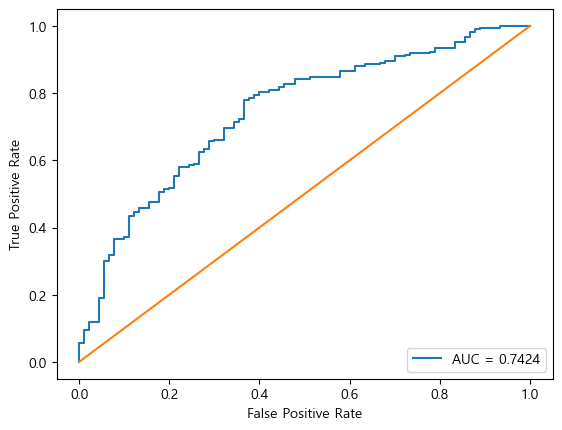

In [17]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_proba )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_proba,
                                  pos_label = 1 )

RocCurveDisplay( fpr = fpr, tpr = tpr ).plot()
plt.legend( labels = ['AUC = %.4f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )
plt.show()
print()

# ====================================================================================

# 로지스틱 회귀분석 - sklearn

## x, y 변수 지정 및 데이터셋 분리

In [18]:
# 독립변수, 종속변수 지정
y = df_credit2.iloc[:,0]
x = df_credit2.iloc[:, 1:]

# 데이터 분할 : train 70%, test 30%
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

## 회귀 모델 생성 및 적합

In [19]:
# 회귀 모델 생성 및 적합
model = LogisticRegression()
model.fit( x_train, y_train )

In [20]:
features = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

df_coef = pd.DataFrame()
df_coef['Feature'], df_coef["Coefficients"] = features, params
df_coef['Odds Ratio'] = np.exp(params)

print(df_coef)
print()

                           Feature  Coefficients  Odds Ratio
0                        intercept      1.255465    3.509468
1                  account.balance      0.612978    1.845921
2           credit.duration.months     -0.416949    0.659054
3   previous.credit.payment.status      0.221259    1.247646
4                   credit.purpose     -0.426923    0.652514
5                    credit.amount     -0.030928    0.969545
6                          savings      0.353555    1.424121
7              employment.duration      0.297259    1.346164
8                 installment.rate     -0.354221    0.701720
9                   marital.status      0.236272    1.266518
10                       guarantor      0.034933    1.035550
11              residence.duration     -0.105171    0.900171
12                  current.assets     -0.287476    0.750154
13                             age      0.188394    1.207309
14                   other.credits      0.163335    1.177431
15                  apar

### 다중공선성 확인

In [21]:
# VIF 확인
x_train = add_constant(x_train)

VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.01
1,account.balance,1.11
2,credit.duration.months,2.18
3,previous.credit.payment.status,1.44
4,credit.purpose,1.09
5,credit.amount,2.49
6,savings,1.09
7,employment.duration,1.31
8,installment.rate,1.45
9,marital.status,1.16


## 평가

In [22]:
# 0, 1 이 예측될 확률
y_proba = fit_model.predict_proba(x_test)

# 예측값
y_pred = fit_model.predict(x_test)

# 결과 데이터프레임 생성
result = pd.DataFrame()
result['y_proba'] = y_proba[:,1]
result['y_pred'] = y_pred
result['y_test'] = y_test

print(result)
print()

      y_proba  y_pred  y_test
0    0.624340       1     NaN
1    0.493360       0     1.0
2    0.845862       1     1.0
3    0.906537       1     NaN
4    0.482565       0     NaN
..        ...     ...     ...
295  0.910426       1     1.0
296  0.894365       1     NaN
297  0.781872       1     NaN
298  0.956786       1     1.0
299  0.653967       1     1.0

[300 rows x 3 columns]



### Confusion Matrix

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 43,  57],
       [ 16, 184]], dtype=int64)

### 분석 지표

In [25]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7566666666666667

              precision    recall  f1-score   support

           0      0.729     0.430     0.541       100
           1      0.763     0.920     0.834       200

    accuracy                          0.757       300
   macro avg      0.746     0.675     0.688       300
weighted avg      0.752     0.757     0.737       300




### ROC curve / AUC

Accuracy:  0.7566666666666667
AUC:  0.7884



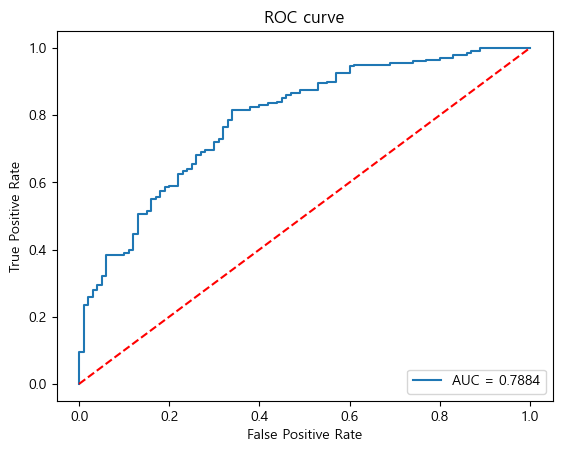

In [26]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_proba[:,1] )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_proba[:,1],
                                  pos_label = 1)

RocCurveDisplay( fpr=fpr, tpr=tpr).plot()

plt.plot( [0,1], [0,1], 'r--' )
plt.title('ROC curve')
plt.legend( labels = ['AUC = %.4f' % auc],
            loc = 'lower right')
plt.show()
print()